In [1]:
# use R to change path to ~/cdai/SpliFi/analysis if current working path is not

setwd("~/cdai/SpliFi/analysis")


In [2]:
suppressMessages(library(tidyverse))
suppressMessages(library(glue))
suppressMessages(library(data.table))
suppressMessages(library(cowplot))
suppressMessages(library(ggrastr))


In [3]:
theme_set(theme_cowplot())


In [4]:
options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 180)


In [5]:
suppressMessages(library(furrr))
plan(multisession, workers = 6)


In [6]:
chroms <- glue("chr{1:22}")
perm <- map_dfr(chroms, ~ fread(glue("../code/results/qtl/noisy/Geuvadis/EUR/separateNoise/cis_100000/perm/{chrom}.addQval.txt.gz", chrom = .x)))


In [7]:
perm[1:5]
dim(perm)
colnames(perm)


phenotype_id,phenotype_chr,phenotype_start,phenotype_end,phenotype_strand,num_variants,best_nom_dist,best_genotype_id,best_genotype_chr,best_genotype_start,⋯,dof_true,dof_est,beta_ml1,beta_ml2,pval_nom,pval_r2,slope,pval_emp,pval_adj,q
<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:15947:16606:clu_3223_-:IN,chr1,15948,16606,-,69,-779,1:17385:G:A,chr1,17385,⋯,358,338.265,0.961087,34.0853,1.26204e-03,0.0286642,0.351697,0.0689311,0.06477620,0.26987
chr1:16310:16606:clu_3223_-:IN,chr1,16311,16606,-,69,-91704,1:108310:T:C,chr1,108310,⋯,358,348.054,1.005160,39.0895,8.30064e-03,0.0193006,0.201541,0.3086910,0.30226300,0.55528
chr1:16765:16857:clu_3224_-:IN,chr1,16766,16857,-,69,-840,1:17697:G:C,chr1,17697,⋯,358,348.963,0.893928,34.6140,2.01663e-03,0.0263169,-0.298423,0.1148850,0.10448800,0.34814
chr1:17055:17232:clu_3225_-:IN,chr1,17056,17232,-,69,-2952,1:20184:A:G,chr1,20184,⋯,358,337.495,0.996317,35.4890,8.93957e-05,0.0420238,-0.530948,0.0029970,0.00515363,0.04335
chr1:17055:17605:clu_3225_-:IN,chr1,17056,17605,-,69,-96364,1:113969:C:T,chr1,113969,⋯,358,348.246,1.013670,37.2786,8.08402e-03,0.0194304,-0.104242,0.2757240,0.27989200,0.53913


[1] 131200     21

[1] "phenotype_id"        "phenotype_chr"       "phenotype_start"    
 [4] "phenotype_end"       "phenotype_strand"    "num_variants"       
 [7] "best_nom_dist"       "best_genotype_id"    "best_genotype_chr"  
[10] "best_genotype_start" "best_genotype_end"   "dof_true"           
[13] "dof_est"             "beta_ml1"            "beta_ml2"           
[16] "pval_nom"            "pval_r2"             "slope"              
[19] "pval_emp"            "pval_adj"            "q"

In [8]:
# select only protein coding ones


In [9]:
qtl <- perm[, .(phenotype_id, pval_emp, pval_adj, q)]


In [10]:
qtl[, itype := str_extract(phenotype_id, "[A-Z]{2}$")]
qtl[, clu := str_extract(phenotype_id, "clu_\\d+_[+-]{1}")]
qtl <- qtl[, .(phenotype_id, pval_emp, pval_adj, q, itype, ctype = paste(sort(unique(itype)), sep = "", collapse = ",")), by = clu]


In [11]:
qtl[clu %in% c("clu_3261_-")][, .(phenotype_id, pval_emp, pval_adj, q, itype, ctype = paste(sort(unique(itype)), sep = "", collapse = ",")), by = clu]


clu,phenotype_id,pval_emp,pval_adj,q,itype,ctype
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
clu_3261_-,chr1:944800:945041:clu_3261_-:UP,0.109890,0.0943645,0.32986,UP,"PR,UP"
clu_3261_-,chr1:944800:945056:clu_3261_-:PR,0.219780,0.2133690,0.48585,PR,"PR,UP"
clu_3261_-,chr1:944819:945056:clu_3261_-:UP,0.923077,0.9116810,0.76655,UP,"PR,UP"


In [12]:
qtl[1:20]
qtl[sample(1:131200, 10)]


clu,phenotype_id,pval_emp,pval_adj,q,itype,ctype
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
clu_3223_-,chr1:15947:16606:clu_3223_-:IN,0.068931100,6.47762e-02,2.6987e-01,IN,IN
clu_3223_-,chr1:16310:16606:clu_3223_-:IN,0.308691000,3.02263e-01,5.5528e-01,IN,IN
clu_3224_-,chr1:16765:16857:clu_3224_-:IN,0.114885000,1.04488e-01,3.4814e-01,IN,IN
clu_3225_-,chr1:17055:17232:clu_3225_-:IN,0.002997000,5.15363e-03,4.3350e-02,IN,IN
clu_3225_-,chr1:17055:17605:clu_3225_-:IN,0.275724000,2.79892e-01,5.3913e-01,IN,IN
clu_3225_-,chr1:17055:17914:clu_3225_-:IN,0.676324000,6.81745e-01,7.1816e-01,IN,IN
clu_3225_-,chr1:17368:17525:clu_3225_-:IN,0.019980000,1.43993e-02,9.7138e-02,IN,IN
clu_3225_-,chr1:17368:17605:clu_3225_-:IN,0.187812000,1.90820e-01,4.6310e-01,IN,IN
clu_3225_-,chr1:17742:17914:clu_3225_-:IN,0.018981000,1.67611e-02,1.0882e-01,IN,IN


clu,phenotype_id,pval_emp,pval_adj,q,itype,ctype
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
clu_57677_-,chr19:49446794:49447023:clu_57677_-:UP,0.173826000,1.61583e-01,4.0636e-01,UP,"PR,UP"
clu_7460_+,chr2:108469084:108469650:clu_7460_+:PR,0.527473000,5.12056e-01,5.9499e-01,PR,"NE,PR,UP"
clu_49160_-,chr16:75380134:75395089:clu_49160_-:UP,0.000999001,5.38279e-08,1.6219e-06,UP,"PR,UP"
clu_14372_-,chr3:172648114:172710846:clu_14372_-:PR,0.838162000,8.40941e-01,6.9801e-01,PR,PR
clu_48987_-,chr16:67946633:67946936:clu_48987_-:PR,0.289710000,2.83379e-01,5.7275e-01,PR,"PR,UP"
clu_22827_-,chr6:118523920:118565528:clu_22827_-:PR,0.233766000,2.23286e-01,4.3952e-01,PR,PR
clu_49537_+,chr17:7223875:7223967:clu_49537_+:PR,0.990010000,9.89982e-01,7.3356e-01,PR,"PR,UP"
clu_38264_+,chr12:95217886:95251939:clu_38264_+:PR,0.000999001,7.88882e-07,1.4619e-05,PR,"PR,UP"
clu_25501_-,chr7:87841714:87843753:clu_25501_-:PR,0.217782000,2.23874e-01,3.9404e-01,PR,"PR,UP"


In [13]:
qtl[1:5]


clu,phenotype_id,pval_emp,pval_adj,q,itype,ctype
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
clu_3223_-,chr1:15947:16606:clu_3223_-:IN,0.0689311,0.06477620,0.26987,IN,IN
clu_3223_-,chr1:16310:16606:clu_3223_-:IN,0.3086910,0.30226300,0.55528,IN,IN
clu_3224_-,chr1:16765:16857:clu_3224_-:IN,0.1148850,0.10448800,0.34814,IN,IN
clu_3225_-,chr1:17055:17232:clu_3225_-:IN,0.0029970,0.00515363,0.04335,IN,IN
clu_3225_-,chr1:17055:17605:clu_3225_-:IN,0.2757240,0.27989200,0.53913,IN,IN


In [14]:
qtl$itype %>% unique()
qtl$ctype %>% unique()


[1] "IN" "UP" "PR" "NE"

[1] "IN"          "PR,UP"       "UP"          "PR"          "NE,PR,UP"   
 [6] "NE,PR"       "IN,NE,PR"    "IN,NE"       "IN,PR,UP"    "IN,PR"      
[11] "NE"          "IN,UP"       "IN,NE,PR,UP" "NE,UP"       "IN,NE,UP"

In [15]:
qtl[, .(clu, ctype)] %>%
  unique() %>%
  .[, .N, by = ctype]


ctype,N
<chr>,<int>
IN,2943
"PR,UP",14598
UP,488
PR,21693
"NE,PR,UP",1277
"NE,PR",2154
"IN,NE,PR",31
"IN,NE",20
"IN,PR,UP",53


## Number of clusters, by type

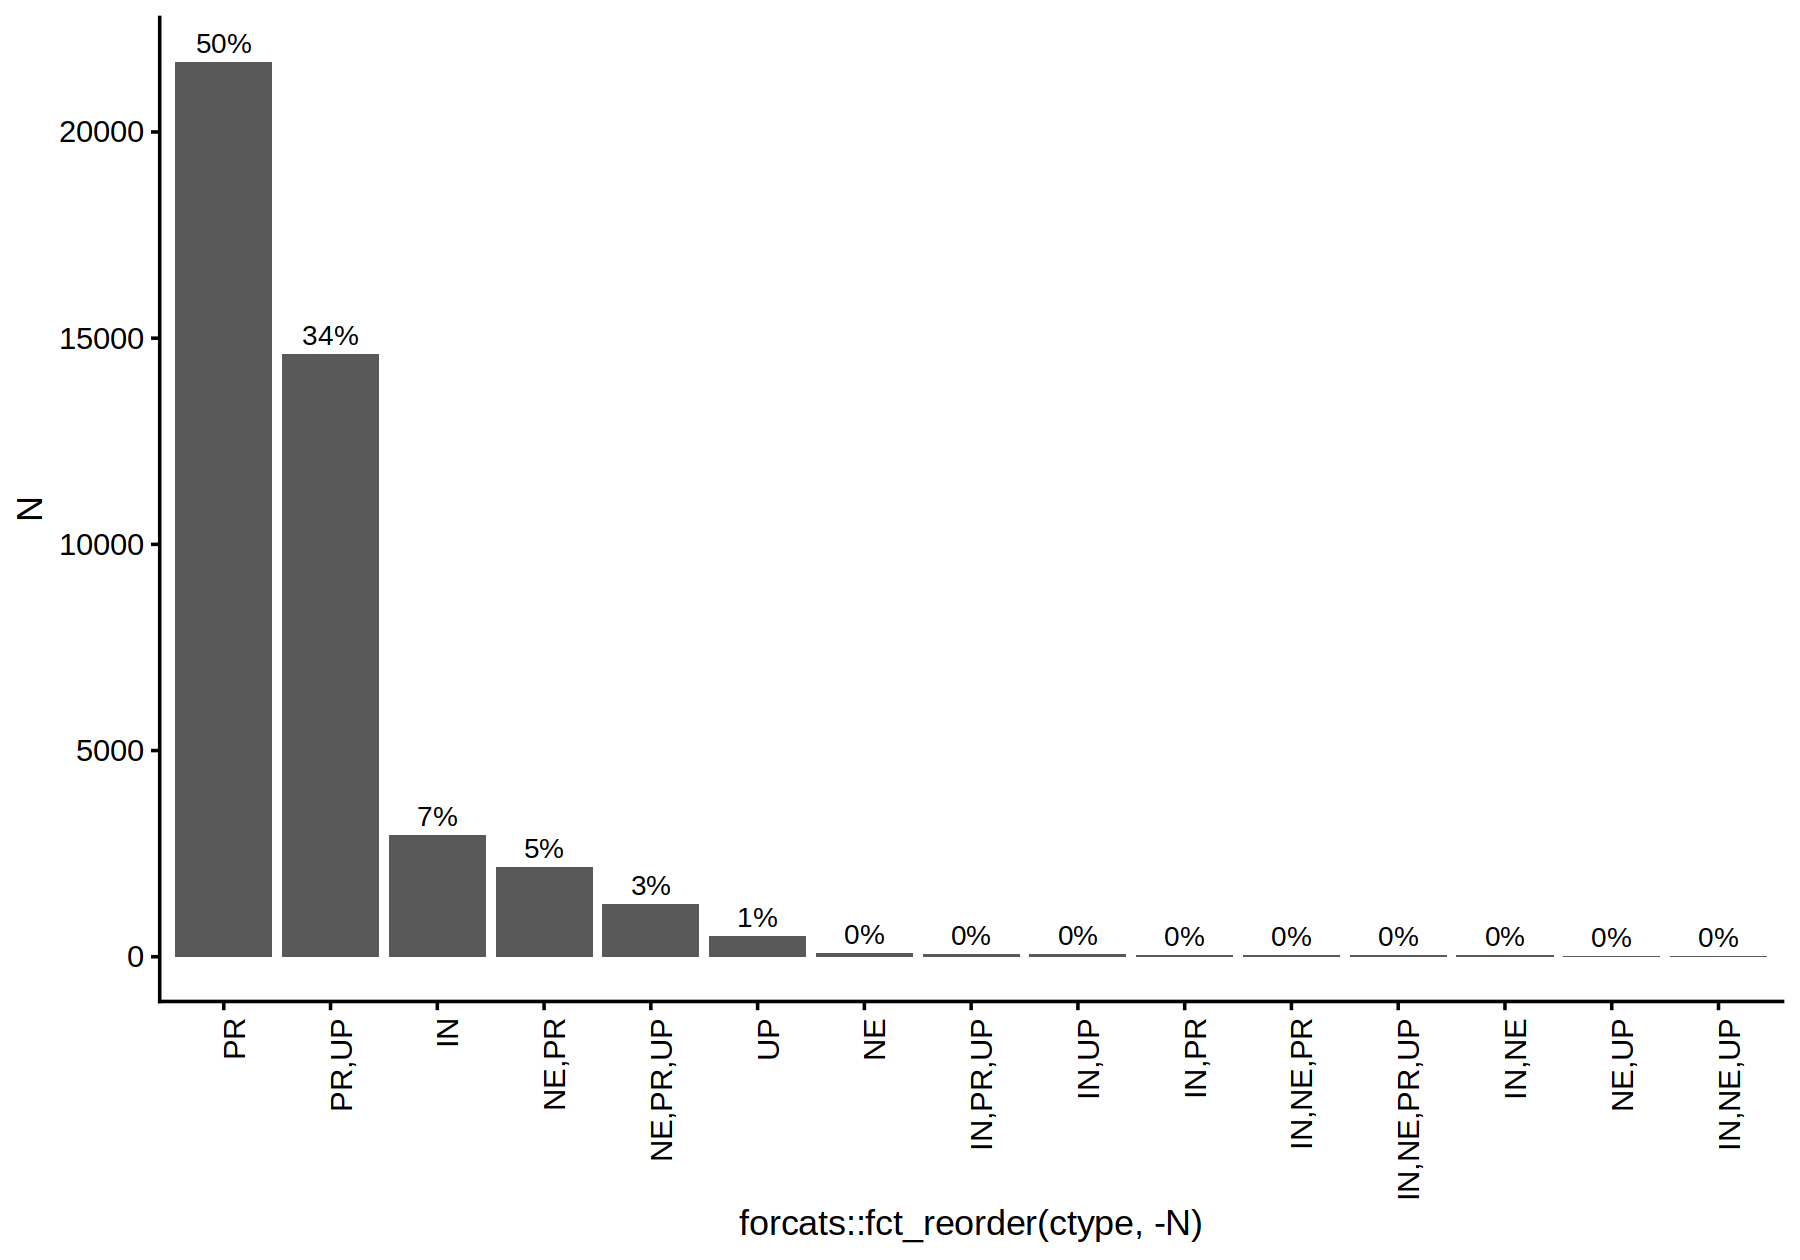

In [56]:
qtl[, .(clu, ctype)] %>%
  unique() %>%
  .[, .N, by = ctype] %>%
  .[, .(ctype, N, P = N / sum(N))] %>%
  ggplot() +
  geom_col(aes(x = forcats::fct_reorder(ctype, -N), N)) +
  geom_text(aes(x = forcats::fct_reorder(ctype, -N), y = N, label = scales::percent(P, 1)), vjust = -0.5) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


## qq plot

Since ctype = PR or "PR,UP" is the vast majority of intron clusters. only select clusters with ctype in "PR" or "PR,UP"


In [128]:
source("~/misc_scripts/utility_funcs.R")

In [59]:
qtl[ctype %in% c("PR", "PR,UP")] %>% head()


clu,phenotype_id,pval_emp,pval_adj,q,itype,ctype
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
clu_3261_-,chr1:944800:945041:clu_3261_-:UP,0.109890,0.0943645,0.32986,UP,"PR,UP"
clu_3261_-,chr1:944800:945056:clu_3261_-:PR,0.219780,0.2133690,0.48585,PR,"PR,UP"
clu_3261_-,chr1:944819:945056:clu_3261_-:UP,0.923077,0.9116810,0.76655,UP,"PR,UP"
clu_3263_-,chr1:945653:946146:clu_3263_-:UP,0.835165,0.8226880,0.75001,UP,"PR,UP"
clu_3263_-,chr1:945653:946172:clu_3263_-:PR,0.817183,0.8302820,0.75129,PR,"PR,UP"
clu_3264_-,chr1:948591:951126:clu_3264_-:UP,0.718282,0.7221930,0.72924,UP,"PR,UP"


In [139]:
qtl[, pval_adj] %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1117  0.3788  0.4084  0.6779  1.0000 

In [149]:
qtl[ctype %in% c("PR", "PR,UP") & q < .1, .(Nclu = uniqueN(clu), Nsj = uniqueN(phenotype_id)), by = .(ctype, itype)]

ctype,itype,Nclu,Nsj
<chr>,<chr>,<int>,<int>
"PR,UP",UP,2447,3239
"PR,UP",PR,2271,3273
PR,PR,2432,3796


### QQ1 - raw intron pvalues

In [16]:
qtl[1:5]

clu,phenotype_id,pval_emp,pval_adj,q,itype,ctype
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
clu_3223_-,chr1:15947:16606:clu_3223_-:IN,0.0689311,0.06477620,0.26987,IN,IN
clu_3223_-,chr1:16310:16606:clu_3223_-:IN,0.3086910,0.30226300,0.55528,IN,IN
clu_3224_-,chr1:16765:16857:clu_3224_-:IN,0.1148850,0.10448800,0.34814,IN,IN
clu_3225_-,chr1:17055:17232:clu_3225_-:IN,0.0029970,0.00515363,0.04335,IN,IN
clu_3225_-,chr1:17055:17605:clu_3225_-:IN,0.2757240,0.27989200,0.53913,IN,IN


In [142]:
# select PR and PR,UP clusters, plot all introns by itype
qq1 <- qtl[ctype %in% c("PR", "PR,UP")][, .(p = pval_adj), by = itype] %>% 
          split(by = "itype") %>%
          map(~.x$p) %>%
          multiqq

In [158]:
qq1 <- qq1 + labs(title = "raw")

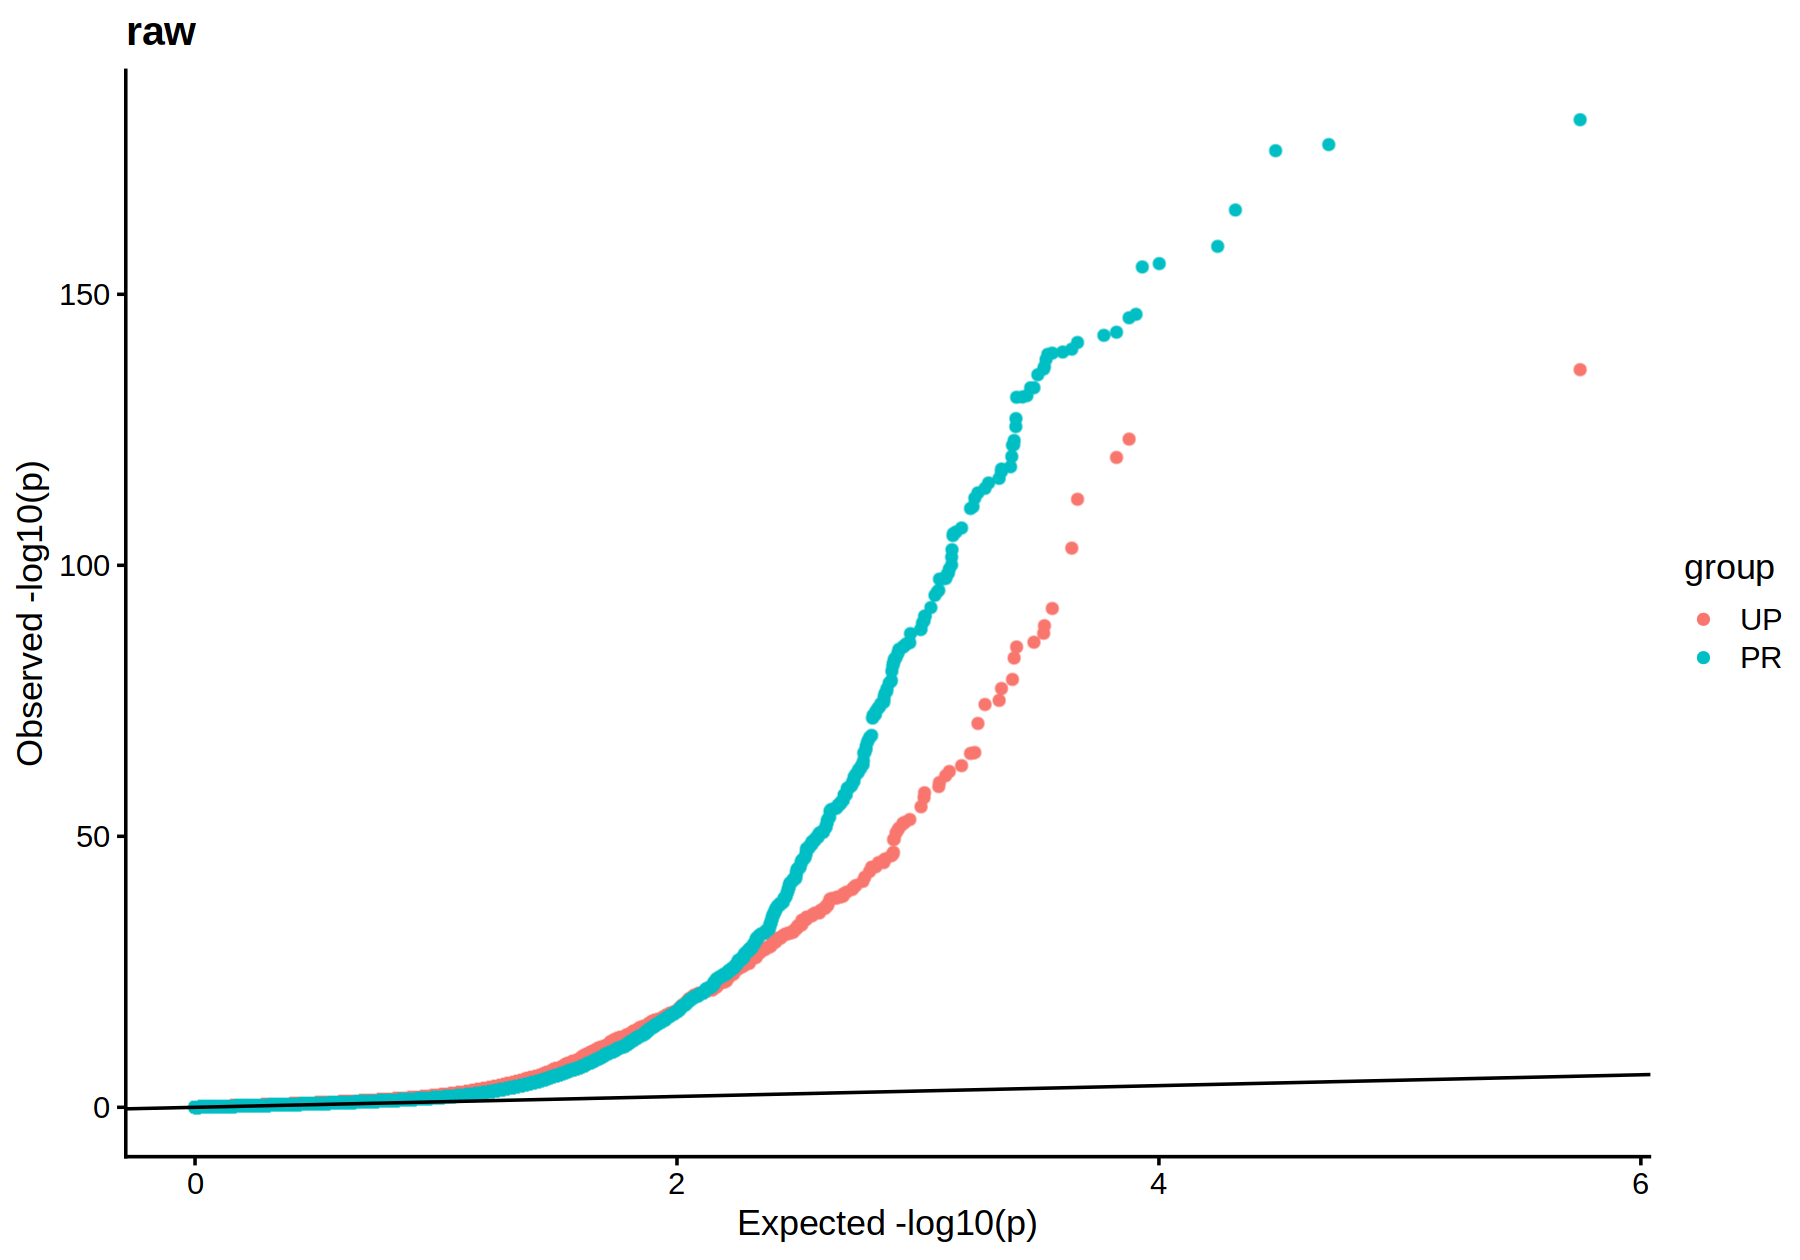

In [159]:
ggrastr::rasterise(qq1, layers = "Point", dpi = 180) 

### label u-sQTL using the best UP intron of cluster
if ctype = PR, then qtype = PR, pick best pvalue for clu
if ctype = PR,UP, then qtype = PR,UP, pick best UP pvalue for clu

In [206]:
labelQTLs = function(df, mode=1) {
  # df is all introns of a cluster
  ctype = unique(df$ctype)
  df = df[, qtype := case_when(ctype == "PR" ~ "p-sQTL",
                          ctype == "PR,UP" ~ "u-sQTL",
                          TRUE ~ "Other")][]
  
  if (ctype == "PR") {
    df = df[, rank := rank(pval_adj, ties.method = "first"), by = ctype][rank == 1]
  } else if (ctype == "PR,UP") {
    if (mode == 1) { # mode 1 use best UP intron to represent the u-sQTL cluster
        df <- df[itype == "UP"]
        df = df[, rank := rank(pval_adj, ties.method = "first"), by = ctype][rank == 1]
    } else { # use any best intron to represent the u-sQTL, it can be PR intron's pvalue
        df = df[, rank := rank(pval_adj, ties.method = "first"), by = ctype][rank == 1]
    }
  }
  return(df)
}

In [171]:
qtl2 = split(qtl[ctype %in% c("PR", "PR,UP")], by = "clu") %>% 
       future_map(labelQTLs)
qtl2 = rbindlist(qtl2)

In [181]:
qtl2[1:5]

clu,phenotype_id,pval_emp,pval_adj,q,itype,ctype,qtype,rank
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>
clu_3261_-,chr1:944800:945041:clu_3261_-:UP,0.109890000,0.094364500,0.3298600,UP,"PR,UP",u-sQTL,1
clu_3263_-,chr1:945653:946146:clu_3263_-:UP,0.835165000,0.822688000,0.7500100,UP,"PR,UP",u-sQTL,1
clu_3264_-,chr1:948594:951126:clu_3264_-:UP,0.570430000,0.555557000,0.6763800,UP,"PR,UP",u-sQTL,1
clu_3265_-,chr1:954523:955922:clu_3265_-:UP,0.000999001,0.000279382,0.0034687,UP,"PR,UP",u-sQTL,1
clu_8_+,chr1:961750:961825:clu_8_+:PR,0.258741000,0.254176000,0.5199700,PR,PR,p-sQTL,1


In [180]:
qtl2[, .N, by = qtype]

qtype,N
<chr>,<int>
u-sQTL,14598
p-sQTL,21693


In [202]:
qq2 <- split(qtl2, by = "qtype") %>%
       map(~.x$pval_adj) %>% 
       multiqq
qq2 <- qq2 + labs(title = "UP,PR sQTLs labled with top UP intron pval")

In [203]:
qq2  <- rasterise(qq2, dpi = 200)

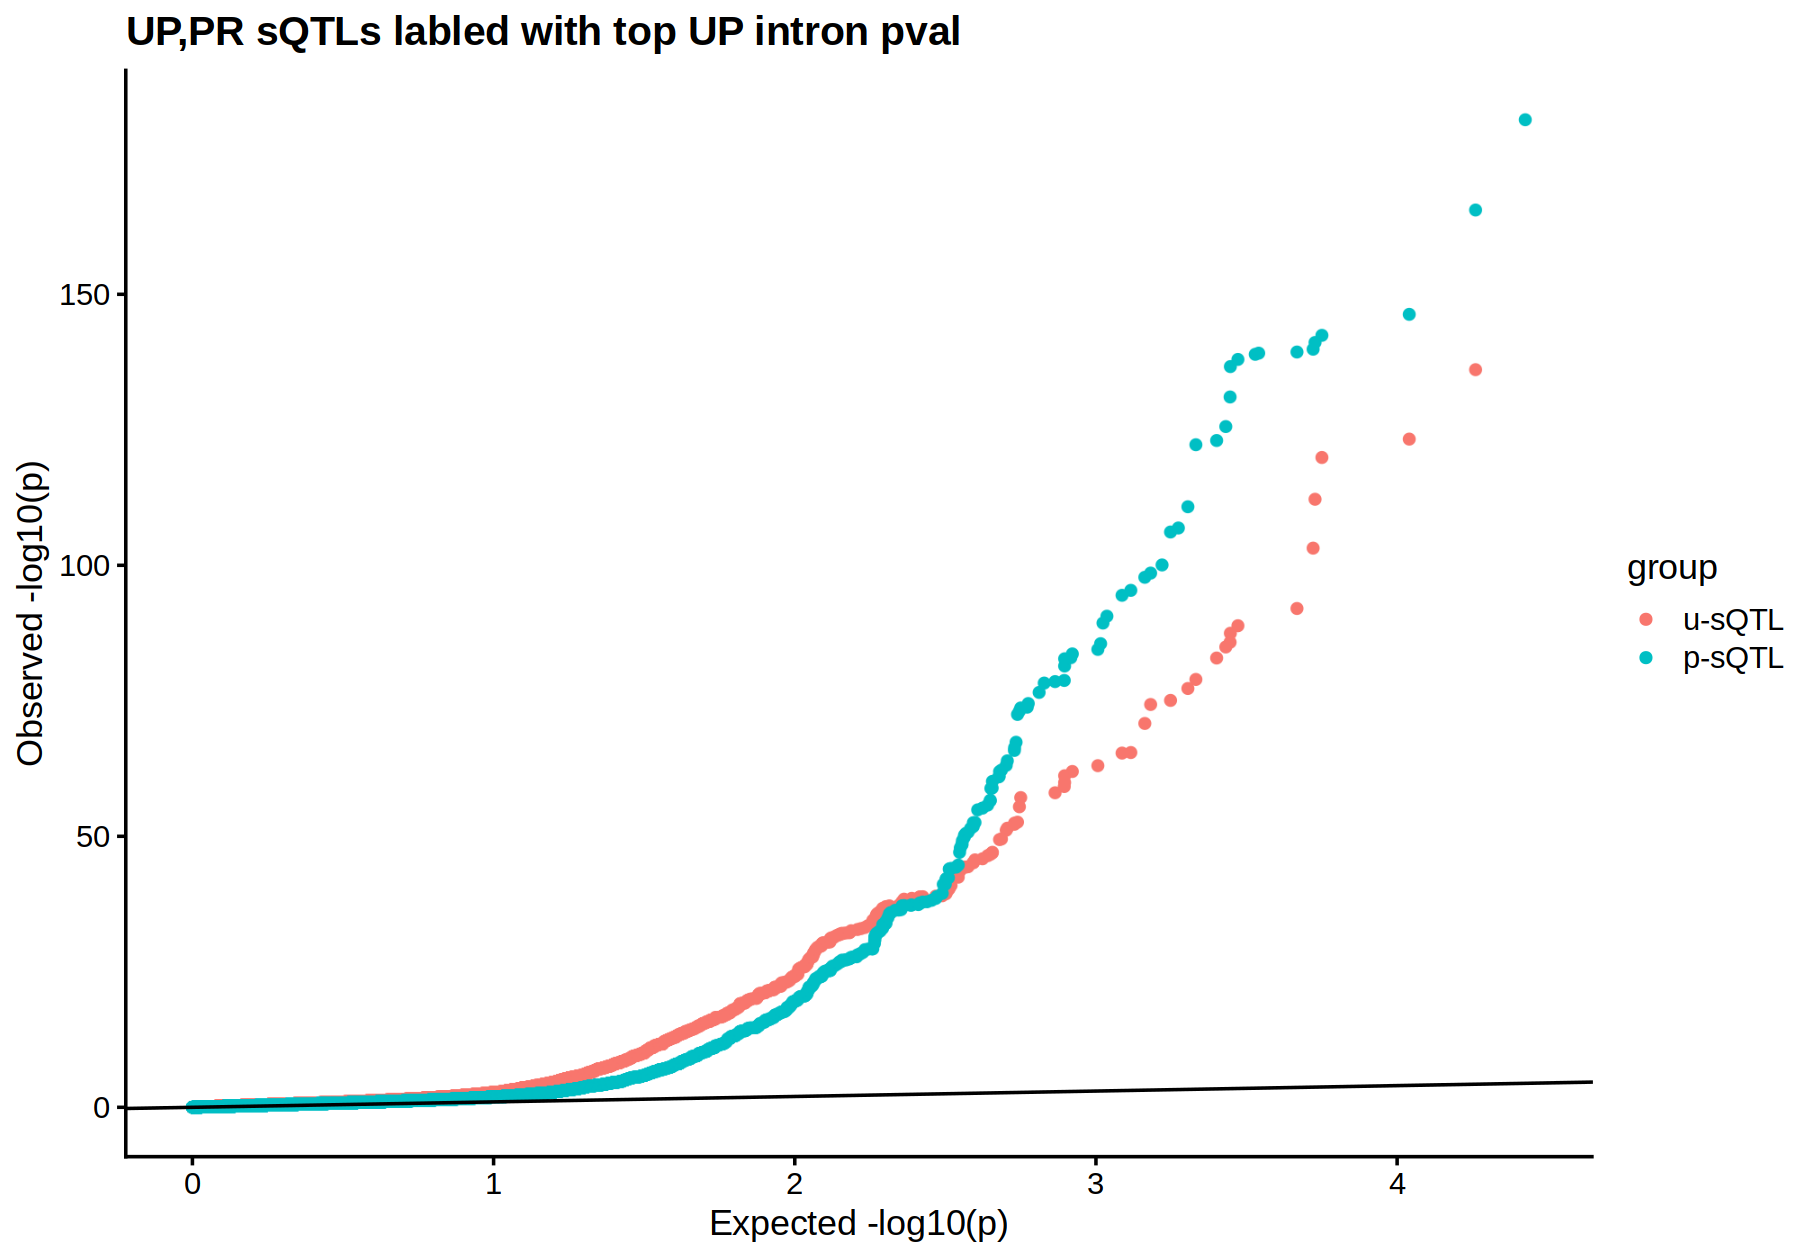

In [204]:
qq2

### Label u-sQTL using the best intron pvalue regardless of itype

In [207]:
qtl3 = split(qtl[ctype %in% c("PR", "PR,UP")], by = "clu") %>% 
       future_map(., ~labelQTLs(.x, mode = 2))
qtl3 = rbindlist(qtl3)

In [209]:
qq3 <- split(qtl3, by = "qtype") %>%
       map(~.x$pval_adj) %>% 
       multiqq
qq3 <- qq3 + labs(title = "UP,PR sQTLs labled with top (UP/pR) intron pval")
qq3  <- rasterise(qq3, dpi = 200)

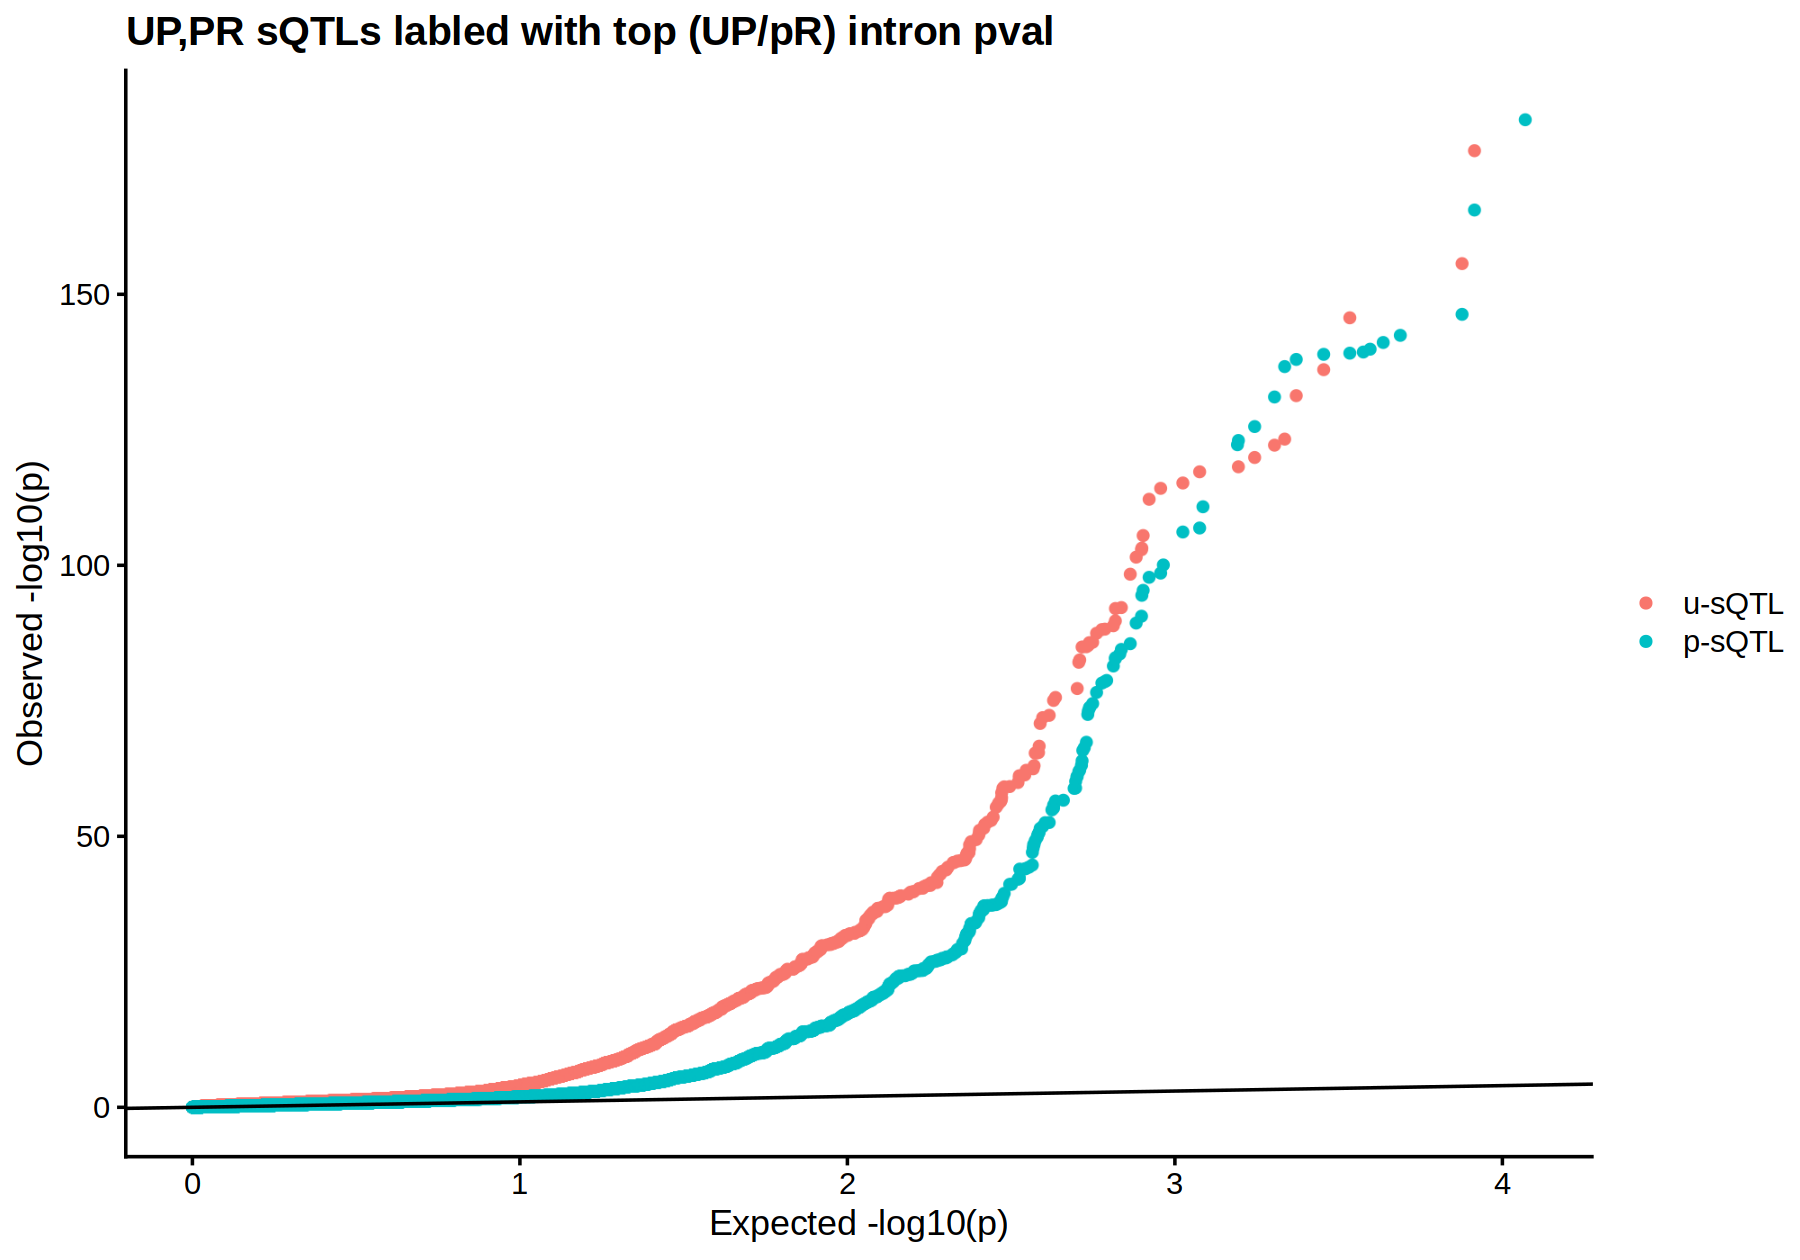

In [212]:
qq3 + theme(legend.title = element_blank())